In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import zipfile

In [36]:
p = "/home/sistemas/Documents/sexto/Covid-LATAM-Study/new/d2021/COVID19MEXICO2021.csv"
df= pd.read_csv(p,usecols=["SEXO","EDAD","TIPO_PACIENTE"])

In [ ]:
df.TIPO_PACIENTE.replace({1:"AMBULATORIO",2:"HOSPITALIZADO",99:"NO ESPECIFICADO"},inplace=True)

In [31]:
bins = [0, 15, 30, 45, 60, 75, 90, 105]
labels = ["Edad0-15", "Edad16-30", "Edad31-45", "Edad46-60", "Edad61-75", "Edad76-90", "Edad91-105"]
age_groups = pd.cut(df.EDAD, bins=bins, labels=labels, right=False)#.value_counts()
for label in labels:
    df[label] = age_groups.get(label, 0)


In [34]:
#df_new = df.drop(columns=['EDAD'])
df_n2 = df_new[df_new["TIPO_PACIENTE"] == 2]
df_n2.TIPO_PACIENTE.value_counts()

TIPO_PACIENTE
2    566176
Name: count, dtype: int64

In [23]:
df_new

,SEXO,TIPO_PACIENTE,Edad0-15,Edad16-30,Edad31-45,Edad46-60,Edad61-75,Edad76-90,Edad91-105
0,2,1,564479,1729583,2046857,1411213,529767,152612,16697
1,2,2,564479,1729583,2046857,1411213,529767,152612,16697
2,1,1,564479,1729583,2046857,1411213,529767,152612,16697
3,2,1,564479,1729583,2046857,1411213,529767,152612,16697
4,1,1,564479,1729583,2046857,1411213,529767,152612,16697
...,...,...,...,...,...,...,...,...,...
6451939,1,2,564479,1729583,2046857,1411213,529767,152612,16697
6451940,2,1,564479,1729583,2046857,1411213,529767,152612,16697
6451941,1,1,564479,1729583,2046857,1411213,529767,152612,16697
6451942,1,1,564479,1729583,2046857,1411213,529767,152612,16697


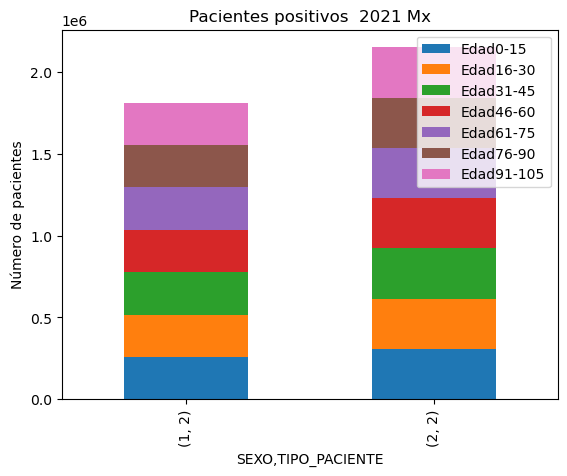

In [35]:
df_n2.groupby(["SEXO", "TIPO_PACIENTE"]).count().plot(kind="bar", stacked=True)
plt.title("Pacientes positivos  2021 Mx")
plt.ylabel("Número de pacientes")
plt.savefig("Papo2021Mx.png")

In [10]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')